<a href="https://colab.research.google.com/github/EricDeop/NLP--Spacy-Preprocessing-/blob/Female-Comments/Female_Comments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

import numpy as np
import pandas as pd

path = "/content/drive/MyDrive/LeaderComment.csv"

df = pd.read_csv(path)

df.head()

Mounted at /content/drive


,SURVEYRESPONDERID,AVERAGE_RESPONSE_DATE,YEAR,MONTH,GENDER,SURVEYQUESTIONESSENCEID,COMMENT
0,17296164,1/7/21,2021,1,Male,30013,Melvins professional demeanor and interpersona...
1,17311889,1/7/21,2021,1,Female,30014,Proved better supervision and support.
2,17334983,1/7/21,2021,1,Male,30013,Proven experience
3,17340598,1/2/21,2021,1,Male,30014,"Let the team do what they were hired to do, so..."
4,17340874,1/2/21,2021,1,Male,30013,They consistently look for opportunities to ma...


In [2]:
#Importing necessary packages
import spacy
import re
import string
from pprint import pprint

import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import matplotlib.pyplot as plt
%matplotlib inline

#Data Cleaning before splitting dataset to only male gender

In [3]:
df['GENDER'] = df['GENDER'].str.lower()

df = df.replace({'GENDER' : {'do not wish to disclose' : 'prefer not to answer',
                        'cisgender' : 'gender not listed', 'm' : 'male', 
                        'f' : 'female'}})

df = df[df["GENDER"].str.contains(
    "non-binary|other gender|gender not listed|gender identity not listed|other gender"
    ) == False]

print("\n")

df['GENDER'].value_counts()

female                  96071
male                    84840
prefer not to answer    24326
Name: GENDER, dtype: int64

In [4]:
#Removing duplicates
#Survey responder ID - Duplicate survey ID indicates same person
#cannot ascertain if duplicate comments exist that they are from the same person
#left comments as is and the other columns too

ids = df['SURVEYRESPONDERID']
duplicates = ids[ids.duplicated()]

print("Duplicate ID's :", duplicates.value_counts().sum(),"\n")

df = df.drop_duplicates(subset=['SURVEYRESPONDERID'])
print("Rows, Columns after Duplicate ID's removed: ",df.shape)

Duplicate ID's : 24 

Rows, Columns after Duplicate ID's removed:  (205213, 7)


In [5]:
# Removing Nan Values

print(df.isna().sum().sort_values(ascending = False))

#NaN values only found in comment column
#Removal of those 4 comments
df = df.dropna()

df.shape

# Dropping AVERAGE_RESPONSE_DATE, YEAR, and MONTH columns as they will 
# not be relevant to this analysis

df = df.drop(columns=['AVERAGE_RESPONSE_DATE', 'YEAR', 'MONTH'], axis=1)
df.head()

COMMENT                    4
SURVEYRESPONDERID          0
AVERAGE_RESPONSE_DATE      0
YEAR                       0
MONTH                      0
GENDER                     0
SURVEYQUESTIONESSENCEID    0
dtype: int64


,SURVEYRESPONDERID,GENDER,SURVEYQUESTIONESSENCEID,COMMENT
0,17296164,male,30013,Melvins professional demeanor and interpersona...
1,17311889,female,30014,Proved better supervision and support.
2,17334983,male,30013,Proven experience
3,17340598,male,30014,"Let the team do what they were hired to do, so..."
4,17340874,male,30013,They consistently look for opportunities to ma...


In [6]:
# Converting all text to lowercase and removing punctuations

def clean_text(text):
  text = text.lower()
  text = re.sub(r'[^\w\s]',' ', text)
  text = re.sub('\[.*?\#]', '', text)
  text = re.sub('\n', ' ', text)
  text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
  return text

cleaning = lambda x: clean_text(x)

In [7]:
df_clean = pd.DataFrame(df['COMMENT'].apply(cleaning))

df["COMMENT"] = df_clean

print(df['COMMENT'].head(10),"\n")
print(df['COMMENT'].tail(10))

0    melvins professional demeanor and interpersona...
1               proved better supervision and support 
2                                   proven experience 
3    let the team do what they were hired to do  so...
4    they consistently look for opportunities to ma...
5    willingness to terminate bad employees  commit...
6    calm  fearless  godliness of character  respec...
7    it doesnt  you have a manager that wife works ...
8    quit pitting the different shifts and departme...
9    pay me what i deserve based on my qualificatio...
Name: COMMENT, dtype: object 

206951               good at communicating what is required
206952                 employ composite industry managers  
206953                        drug test and stick to policy
206954                     passion and drive for results   
206955    spend money in the right areas   stop employin...
206956    his open and willingness to describe what is g...
206957    howard makes sure that we feel safe and feel c...

In [8]:
#Splitting Original data to only FEMALE under GENDER column

female = df[df["GENDER"].str.match("female") == True]

female.head()

,SURVEYRESPONDERID,GENDER,SURVEYQUESTIONESSENCEID,COMMENT
1,17311889,female,30014,proved better supervision and support
6,17341738,female,30013,calm fearless godliness of character respec...
8,17341752,female,30014,quit pitting the different shifts and departme...
11,17341807,female,30013,the leaders at pa one call have proven their c...
12,17341840,female,30014,i would like to see policies that focus less o...


In [9]:
# Splitting MALE gender by SURVEYQUESTIONESSENCEID

female_inspire = female[female["SURVEYQUESTIONESSENCEID"] == 30013]
female_gain = female[female["SURVEYQUESTIONESSENCEID"] == 30014]


print(female_inspire.iloc[[0,1,2,3,4],[1,2]], "\n")
print(female_gain.iloc[[0,1,2,3,4],[1,2]])

    GENDER  SURVEYQUESTIONESSENCEID
6   female                    30013
11  female                    30013
14  female                    30013
17  female                    30013
23  female                    30013 

    GENDER  SURVEYQUESTIONESSENCEID
1   female                    30014
8   female                    30014
12  female                    30014
15  female                    30014
40  female                    30014


In [10]:
print(female_inspire.value_counts)
print(female_gain.value_counts)

<bound method DataFrame.value_counts of         SURVEYRESPONDERID  GENDER  SURVEYQUESTIONESSENCEID  \
6                17341738  female                    30013   
11               17341807  female                    30013   
14               17341879  female                    30013   
17               17347734  female                    30013   
23               17356655  female                    30013   
...                   ...     ...                      ...   
206940           23340863  female                    30013   
206943           23341503  female                    30013   
206950           23342653  female                    30013   
206954           23342696  female                    30013   
206957           23343130  female                    30013   

                                                  COMMENT  
6       calm  fearless  godliness of character  respec...  
11      the leaders at pa one call have proven their c...  
14            listening skills  con

#TOKENIZATION

In [11]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

female_inspire_words = list(sent_to_words(female_inspire["COMMENT"]))

female_gain_words = list(sent_to_words(female_gain["COMMENT"]))

print(female_inspire_words[:1],"\n")

print(female_gain_words[:1])

[['calm', 'fearless', 'godliness', 'of', 'character', 'respectful', 'really', 'cares', 'about', 'their', 'employees']] 

[['proved', 'better', 'supervision', 'and', 'support']]


In [12]:
print(len(female_inspire_words))
print(len(female_gain_words))

56806
39250


#Forming Bigrams in Datasets

In [13]:
#Bigrams

inspire_bigram = gensim.models.Phrases(female_inspire_words, min_count=3,threshold=10)

gain_bigram = gensim.models.Phrases(female_gain_words, min_count=3,threshold=10)

In [14]:
bigram_mod_inspire = gensim.models.phrases.Phraser(inspire_bigram)

bigram_mod_gain = gensim.models.phrases.Phraser(gain_bigram)

In [15]:
def make_inspire_bigrams(texts):
    return [bigram_mod_inspire[doc] for doc in texts]

def make_gain_bigrams(texts):
    return [bigram_mod_gain[doc] for doc in texts]

female_inspire_words = make_inspire_bigrams(female_inspire_words)

female_gain_words = make_gain_bigrams(female_gain_words)

In [16]:
print(female_inspire_words[0])

print(female_gain_words[1])

['calm', 'fearless', 'godliness', 'of', 'character', 'respectful', 'really', 'cares_about', 'their', 'employees']
['quit', 'pitting', 'the', 'different', 'shifts', 'and', 'departments', 'against_each', 'other', 'treat', 'all', 'fairly', 'quit', 'playing_favorites', 'make_sure', 'the', 'distribution', 'of', 'work', 'is', 'equal', 'all', 'around', 'make_sure', 'everyone', 'is', 'pulling_their', 'weight', 'if', 'task', 'is', 'not', 'suited', 'to', 'ones', 'personality', 'try', 'something', 'different']


In [17]:
print(len(female_inspire_words))
print(len(female_gain_words))

56806
39250


#Removing Stop Words with manual list added and removal of bigrams from dataset

In [18]:
import spacy.cli
spacy.cli.download("en_core_web_lg")

nlp = spacy.load('en_core_web_lg', disable = ['parser','ner'])

print(nlp.Defaults.stop_words)

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
{'been', 'below', 'have', 'else', 'off', 'get', 'because', 'forty', "'ve", 'toward', 'so', 'used', 'take', 'due', 'such', 'doing', 'made', 'seeming', '‘d', 'too', 'there', '’d', '‘ll', 'behind', "n't", 'against', 'mostly', 'onto', 'wherever', 'hence', 'n‘t', 'as', 'yet', 'who', 'with', 'except', 'while', 'very', 'often', 'afterwards', 'a', 'none', 'done', 'just', 'themselves', '’ll', 'this', 'either', 'somehow', 'which', 'become', 'everyone', 'besides', 'using', 'will', 'twelve', 'our', 'more', 'your', 'any', 'via', 'again', 'call', 'to', 'few', 'give', 'least', 'during', 'anything', 'say', 'nobody', 'whereafter', 'perhaps', 'thereafter', 'third', 'three', 'herein', 'name', 'whose', 'under', 'eleven', 'when', 'does', 'same', 'unless', "'m", 'further', 'amount', 'being', 'otherwise', 'thru', 'had', 'almost', 'what', 'may', 'i', 'am', 'keep', "'d", 'own', 'anyway', 'where', 'that', 'here'

In [19]:
#Adding my own stop words to list to get a better topic model

nlp.Defaults.stop_words |= {'employee','employees', 'company', 'work', 'people', 'like', 
                            'feel', 'leadership','know', 'time', 'staff', 
                            'better', 'leader', 'good', 'team', 'don','confidence',
                            'great', 'ceo', 'care', 'new', 'job', 'business',
                            'things', 'listen', 'decisions','doesn','u','come'}

In [20]:
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in nlp.Defaults.stop_words] for doc in texts]

In [21]:
inspire_words_nostops = remove_stopwords(female_inspire_words)

gain_words_nostops = remove_stopwords(female_gain_words)

In [22]:
#Making bigrams with data set with no stop words

inspire_nostops_bigrams = make_inspire_bigrams(inspire_words_nostops)

gain_nostops_bigrams = make_gain_bigrams(gain_words_nostops)

In [23]:
print(inspire_nostops_bigrams[0:5],"\n")
      
print(gain_nostops_bigrams[0:5]) 

[['calm', 'fearless', 'godliness', 'character', 'respectful', 'cares_about'], ['leaders', 'pa', 'proven', 'committment', 'quality', 'hard', 'shown', 'lot', 'making_sure', 'need', 'management', 'handles', 'highest', 'standards', 'expects'], ['mission'], ['knows', 'wants', 'those_around', 'focused_on', 'education', 'making_sure', 'firstperson', 'opportunities', 'available', 'resources'], ['confident', 'change', 'bigger_than', 'actually']] 

[['proved', 'supervision', 'support'], ['quit', 'pitting', 'different', 'shifts', 'departments', 'against_each', 'treat', 'fairly', 'quit', 'make_sure', 'distribution', 'equal', 'make_sure', 'pulling_their', 'weight', 'task', 'suited', 'ones', 'personality', 'try', 'different'], ['policies', 'focus', 'strikes', 'written', 'warnings', 'deducting', 'points', 'look', 'holistically', 'supports', 'efforts', 'seems_like', 'lot', 'policies', 'geared_towards', 'penalizing', 'bad', 'unforgiving', 'ways', 'frustrate', 'trying', 'cheat', 'system'], ['act_like', 

# Lemmatization

In [24]:
def lemmatization(texts, allowed_postags=['NOUN','ADJ', 'VERB','ADV']):
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

inspire_final_words = lemmatization(inspire_nostops_bigrams, allowed_postags = [
    'NOUN','ADJ', 'VERB','ADV'])

gain_final_words = lemmatization(gain_nostops_bigrams, allowed_postags = [
    'NOUN','ADJ', 'VERB','ADV'])

print(inspire_final_words[:1])
print(gain_final_words[:1])

[['godliness', 'character', 'respectful']]
[['prove', 'supervision', 'support']]


#EDA

In [25]:
long_list_inspire = [item for sublist in inspire_final_words for item in sublist]   

long_list_gain = [item for sublist in gain_final_words for item in sublist]   

In [26]:
from nltk import word_tokenize, pos_tag
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

def vb_adj(text):
    '''Given a string of text, tokenize the text and pull out only the nouns.'''
    is_vb_adj = lambda pos: pos[:2] == 'VB' or pos[:2] == 'JJ'
    tokenized = word_tokenize(text)
    all_vbs_adj = [word for (word, pos) in pos_tag(tokenized) if is_vb_adj(pos)]
    return ' '.join(all_vbs_adj) 

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [27]:
long_string_inspire = ' '.join(long_list_inspire)

long_string_gain = ' '.join(long_list_gain)

In [28]:
inspire_verbs_adj = vb_adj(long_string_inspire)

inspire_verbs_adj_tokens = word_tokenize(inspire_verbs_adj)

gain_verbs_adj = vb_adj(long_string_gain)

gain_verbs_adj_tokens = word_tokenize(gain_verbs_adj)

In [29]:
print(inspire_verbs_adj_tokens[:4])
print(gain_verbs_adj_tokens[:4])

['respectful', 'hard', 'need', 'handle']
['prove', 'quit', 'pit', 'different']


In [30]:
print(len(inspire_verbs_adj_tokens))

print(len(gain_verbs_adj_tokens))

122243
124591


In [31]:
from nltk.probability import FreqDist

fd_inspire = FreqDist(inspire_verbs_adj_tokens)

fd_gain = FreqDist(gain_verbs_adj_tokens)

print(fd_inspire.tabulate(50))
print(fd_gain.tabulate(50))

         make          want          open      positive       believe          good         think          know        strong       willing  approachable     confident          need          take          grow          hard       genuine            go          give knowledgeable      pandemic    understand        listen        honest    appreciate          keep     important          hear       provide           see      continue        future       improve    supportive    individual          come         smart        happen          lead         clear     encourage       succeed          easy     available   transparent         speak    personable          love          able        update 
         2613          2417          2352          2109          1896          1813          1578          1513          1268          1265          1265          1214          1201          1069          1042          1008           948           889           865           864           815      

Text(0.5, 1.0, "Female TOP 50 words\n--Survey Essence ID: 30013--\n Question: 'What about the leader\n of this company\n inspires your confidence?'")

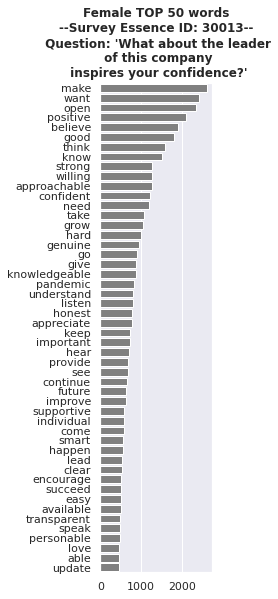

In [32]:
import seaborn as sns
sns.set_theme(style="ticks")
top_inspire = fd_inspire.most_common(50)

fdist_inspire = pd.Series(dict(top_inspire))

sns.set(rc = {'figure.figsize':(2,9)})
pnta_inspire = sns.barplot(y=fdist_inspire.index, x=fdist_inspire.values, color='grey')
pnta_inspire.set_title("Female TOP 50 words\n--Survey Essence ID: 30013--\n Question: 'What about the leader\n of this company\n inspires your confidence?'", weight='bold')

Text(0.5, 1.0, "Females TOP 50 words\n--Survey Essence ID: 30014--\n Question: 'What could the leader of\n this company do to\n gain your full confidence?'")

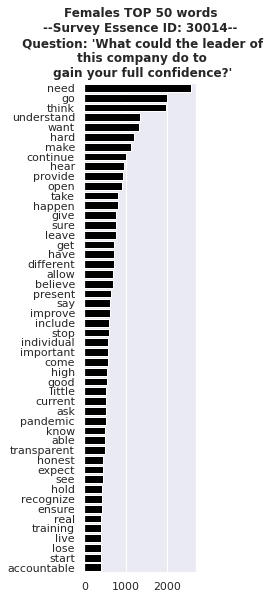

In [33]:
sns.set_theme(style="ticks")
top_gain = fd_gain.most_common(50)

fdist_gain = pd.Series(dict(top_gain))

sns.set(rc = {'figure.figsize':(2,9)})
Female_gain = sns.barplot(y=fdist_gain.index, x=fdist_gain.values, color='black')
Female_gain.set_title("Females TOP 50 words\n--Survey Essence ID: 30014--\n Question: 'What could the leader of\n this company do to\n gain your full confidence?'", weight ='bold')

In [34]:
print(sum(fdist_inspire.values[:50]))
print(sum(fdist_gain.values[:50]))

47352
37219


In [35]:
top_50_inspire = fd_inspire.most_common(50)
top_50_gain = fd_gain.most_common(50)

fdist_50_inspire = pd.Series(dict(top_50_inspire))
fdist_50_gain = pd.Series(dict(top_50_gain))


print(fdist_50_inspire.index[:50])
print(fdist_50_gain.index[:50])

Index(['make', 'want', 'open', 'positive', 'believe', 'good', 'think', 'know',
       'strong', 'willing', 'approachable', 'confident', 'need', 'take',
       'grow', 'hard', 'genuine', 'go', 'give', 'knowledgeable', 'pandemic',
       'understand', 'listen', 'honest', 'appreciate', 'keep', 'important',
       'hear', 'provide', 'see', 'continue', 'future', 'improve', 'supportive',
       'individual', 'come', 'smart', 'happen', 'lead', 'clear', 'encourage',
       'succeed', 'easy', 'available', 'transparent', 'speak', 'personable',
       'love', 'able', 'update'],
      dtype='object')
Index(['need', 'go', 'think', 'understand', 'want', 'hard', 'make', 'continue',
       'hear', 'provide', 'open', 'take', 'happen', 'give', 'sure', 'leave',
       'get', 'have', 'different', 'allow', 'believe', 'present', 'say',
       'improve', 'include', 'stop', 'individual', 'important', 'come', 'high',
       'good', 'little', 'current', 'ask', 'pandemic', 'know', 'able',
       'transparent', '

In [36]:
#Adding words to stop list that are common to both lists

inspire_top_50 = ['make', 'want', 'open', 'positive', 'believe', 'good', 'think', 'know',
       'strong', 'willing', 'approachable', 'confident', 'need', 'take',
       'grow', 'hard', 'genuine', 'go', 'give', 'knowledgeable', 'pandemic',
       'understand', 'listen', 'honest', 'appreciate', 'keep', 'important',
       'hear', 'provide', 'see', 'continue', 'future', 'improve', 'supportive',
       'individual', 'come', 'smart', 'happen', 'lead', 'clear', 'encourage',
       'succeed', 'easy', 'available', 'transparent', 'speak', 'personable',
       'love', 'able', 'update']

gain_top_50 = ['need', 'go', 'think', 'understand', 'want', 'hard', 'make', 'continue',
       'hear', 'provide', 'open', 'take', 'happen', 'give', 'sure', 'leave',
       'get', 'have', 'different', 'allow', 'believe', 'present', 'say',
       'improve', 'include', 'stop', 'individual', 'important', 'come', 'high',
       'good', 'little', 'current', 'ask', 'pandemic', 'know', 'able',
       'transparent', 'honest', 'expect', 'see', 'hold', 'recognize', 'ensure',
       'real', 'training', 'live', 'lose', 'start', 'accountable']


gain_inpspire_common_words = []

for word in inspire_top_50:
  if word in gain_top_50:
    gain_inpspire_common_words.append(word) 

In [37]:
print(gain_inpspire_common_words) 
print(len(gain_inpspire_common_words))
#WORDS ADDED TO STOPWORD LIST

['make', 'want', 'open', 'believe', 'good', 'think', 'know', 'need', 'take', 'hard', 'go', 'give', 'pandemic', 'understand', 'honest', 'important', 'hear', 'provide', 'see', 'continue', 'improve', 'individual', 'come', 'happen', 'transparent', 'able']
26


In [38]:
nlp.Defaults.stop_words |= {'make', 'want', 'open', 'believe', 'good', 'think',
                            'know', 'need', 'take', 'hard', 'go', 'give',
                            'pandemic', 'understand', 'honest', 'important', 
                            'hear', 'provide', 'see', 'continue', 'improve', 
                            'individual', 'come', 'happen', 'transparent', 
                            'able','big','happen','look','live','sure',
                            'real','stop','allow','current','little','different',
                            'try','confident','big','try','right','live','current',
                            'sure','run','little','allow','high',
                            'bad','different','start','lead','real',
                            'bring','hold','true','set','different','inspire','hold',
                            'stop','little','follow','high','allow',
                            'real','look','bad','expect','focus','present',
                            'let','find','tell','start','ask','invest','big',
                            'actual','actually'}

In [39]:
#stopwords removed after lemmatization and implementing common
#word between datasets

inspire_final_verbs_adj = remove_stopwords(inspire_verbs_adj_tokens)

gain_final_verbs_adj = remove_stopwords(gain_verbs_adj_tokens)

# Creating corpus for Topic Modeling

In [40]:
id2inspire = corpora.Dictionary(inspire_final_verbs_adj)

id2gain = corpora.Dictionary(gain_final_verbs_adj)

inspire_texts = inspire_final_verbs_adj

gain_texts = gain_final_verbs_adj

inspire_corpus = [id2inspire.doc2bow(text) for text in inspire_texts]

gain_corpus = [id2gain.doc2bow(text) for text in gain_texts]

print(inspire_corpus[:1])
print(gain_corpus[:1])

[[(0, 1)]]
[[(0, 1)]]


In [41]:
lda_inspire_model = gensim.models.ldamodel.LdaModel(corpus=inspire_corpus,
                                           id2word=id2inspire,
                                           num_topics=2, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=3,
                                           alpha='auto',
                                           per_word_topics=True)


lda_gain_model = gensim.models.ldamodel.LdaModel(corpus=gain_corpus,
                                           id2word=id2gain,
                                           num_topics=2, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=3,
                                           alpha='auto',
                                           per_word_topics=True)

# Female topics for those who answered

# **"What about the leader of this company inspires your confidence?"**

In [42]:
pprint(lda_inspire_model.print_topics())
doc_inspire_lda = lda_inspire_model[inspire_corpus]

[(0,
  '0.028*"willing" + 0.024*"grow" + 0.023*"future" + 0.020*"knowledgeable" + '
  '0.017*"supportive" + 0.015*"appreciate" + 0.013*"succeed" + 0.011*"love" + '
  '0.011*"personable" + 0.011*"ensure"'),
 (1,
  '0.036*"positive" + 0.032*"approachable" + 0.025*"strong" + 0.019*"genuine" '
  '+ 0.016*"smart" + 0.015*"clear" + 0.013*"recognize" + 0.012*"appear" + '
  '0.011*"professional" + 0.010*"learn"')]


# Female topics for those who answered

# **"What could the leader of this company do to gain your full confidence?"**

In [43]:
pprint(lda_gain_model.print_topics())
doc_gain_lda = lda_gain_model[gain_corpus]

[(0,
  '0.017*"leave" + 0.014*"include" + 0.012*"lose" + 0.010*"patient" + '
  '0.009*"personal" + 0.008*"pay" + 0.008*"corporate" + 0.007*"appreciate" + '
  '0.007*"add" + 0.006*"update"'),
 (1,
  '0.011*"grow" + 0.009*"build" + 0.008*"clear" + 0.008*"accountable" + '
  '0.008*"communicate" + 0.008*"recognize" + 0.007*"large" + 0.007*"ensure" + '
  '0.007*"direct" + 0.007*"positive"')]


# DATA VISUALIZATIONS

In [44]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=d51ad3206eb960e8a5565446e59403827c2dc49b85d62d058f664956f34e6e18
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


In [45]:
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
inspire_vis = pyLDAvis.gensim_models.prepare(lda_inspire_model, inspire_corpus, id2inspire)
inspire_vis

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.151461  0.0       1        1  50.024243
0     -0.151461  0.0       2        1  49.975757, topic_info=             Term         Freq        Total Category  logprob  loglift
22       positive  1455.000000  1455.000000  Default  30.0000  30.0000
130  approachable  1294.000000  1294.000000  Default  29.0000  29.0000
107       willing  1128.000000  1128.000000  Default  28.0000  28.0000
234        strong   999.000000   999.000000  Default  27.0000  27.0000
79           grow   977.000000   977.000000  Default  26.0000  26.0000
..            ...          ...          ...      ...      ...      ...
334          safe   299.398624   302.363902   Topic2  -4.8998   0.6838
72    informative   209.372251   211.205551   Topic2  -5.2574   0.6849
229      possible   187.055607   189.203303   Topic2  -5.3702   0.6822
644     all_level   199.282067   209.295414   Topic2  -5.3068   0.6446
231        humble   255.748522   374.047856   Topic2  -5.0574   0.3134

[104 rows x 6 columns], token_table=      Topic      Freq           Term
term                                
458       1  0.993549     accessible
458       2  0.009493     accessible
644       1  0.047779      all_level
644       2  0.950809      all_level
138       1  0.996140        amazing
...     ...       ...            ...
478       2  0.009046  understanding
14        1  0.002451         update
14        2  0.997680         update
107       1  0.000886        willing
107       2  0.998627        willing

[148 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [46]:
gain_vis = pyLDAvis.gensim_models.prepare(lda_gain_model, gain_corpus, id2gain)
gain_vis

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x    y  topics  cluster       Freq
topic                                           
1      0.071393  0.0       1        1  50.011042
0     -0.071393  0.0       2        1  49.988958, topic_info=            Term        Freq       Total Category  logprob  loglift
334        leave  714.000000  714.000000  Default  30.0000  30.0000
15       include  592.000000  592.000000  Default  29.0000  29.0000
53          lose  492.000000  492.000000  Default  28.0000  28.0000
126         grow  481.000000  481.000000  Default  27.0000  27.0000
302      patient  446.000000  446.000000  Default  26.0000  26.0000
..           ...         ...         ...      ...      ...      ...
322        spend  243.180744  342.838228   Topic2  -5.1524   0.3499
309  acknowledge  189.102610  250.210504   Topic2  -5.4039   0.4134
488    clinician  250.892189  504.037864   Topic2  -5.1212  -0.0043
602       strong  196.250503  288.531616   Topic2  -5.3668   0.3080
611       senior  179.785884  253.060388   Topic2  -5.4544   0.3515

[115 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
134       1  0.994066  accountable
134       2  0.005763  accountable
309       1  0.243795  acknowledge
309       2  0.755364  acknowledge
175       1  0.010037          add
...     ...       ...          ...
323       2  0.982364       update
142       1  0.979802      visible
142       2  0.023329      visible
276       1  0.085986      willing
276       2  0.912200      willing

[168 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1])

In [47]:
pyLDAvis.save_html(inspire_vis, 'lda_inspire.html')
pyLDAvis.save_html(gain_vis, 'lda_gain.html')

#WORD CLOUDS

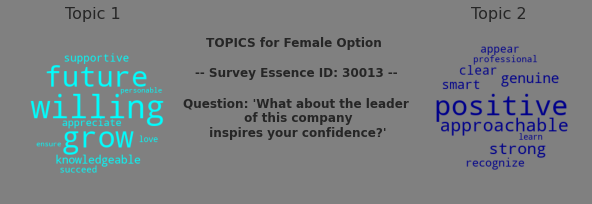

In [48]:
import matplotlib.colors as mcolors
from wordcloud import WordCloud

colsi = [color for name, color in mcolors.CSS4_COLORS.items()]

x, y = np.ogrid[:290, :290]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 120 ** 2
mask = 255 * mask.astype(int)

cloud_inspire = WordCloud(background_color='gray',
                  width=500,
                  height=500,
                  mask=mask,
                  max_words=100,
                  color_func=lambda *args, **kwargs: colsi[i+20],
                  prefer_horizontal=1.0)

topics = lda_inspire_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 2, figsize=(15,3), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud_inspire.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud_inspire)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16))
    plt.gca().axis('off')

fig.patch.set_facecolor('grey')
fig.suptitle("TOPICS for Female Option \n\n-- Survey Essence ID: 30013 --\n\nQuestion: 'What about the leader\n of this company\n inspires your confidence?'",
             fontweight='bold',y=0.8,fontsize=12)

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

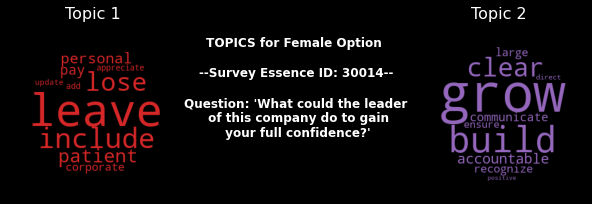

In [49]:
colsd = [color for name, color in mcolors.TABLEAU_COLORS.items()]

cloud_gain = WordCloud(background_color='black',
                  width=500,
                  height=500,
                  max_words=100,
                  mask=mask,
                  color_func=lambda *args, **kwargs: colsd[i+3],
                  prefer_horizontal=1.0)

topics = lda_gain_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 2, figsize=(15,3), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud_gain.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud_gain)
    plt.gca().set_title('Topic ' + str(i+1), fontdict=dict(size=16), color='white')
    plt.gca().axis('off')

fig.patch.set_facecolor('black')
fig.suptitle("TOPICS for Female Option \n\n--Survey Essence ID: 30014--\n\nQuestion: 'What could the leader\n of this company do to gain\n your full confidence?'",
             fontweight='bold',y=0.8,fontsize=12, color='white')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()